In [1]:
import cv2
import imageio 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

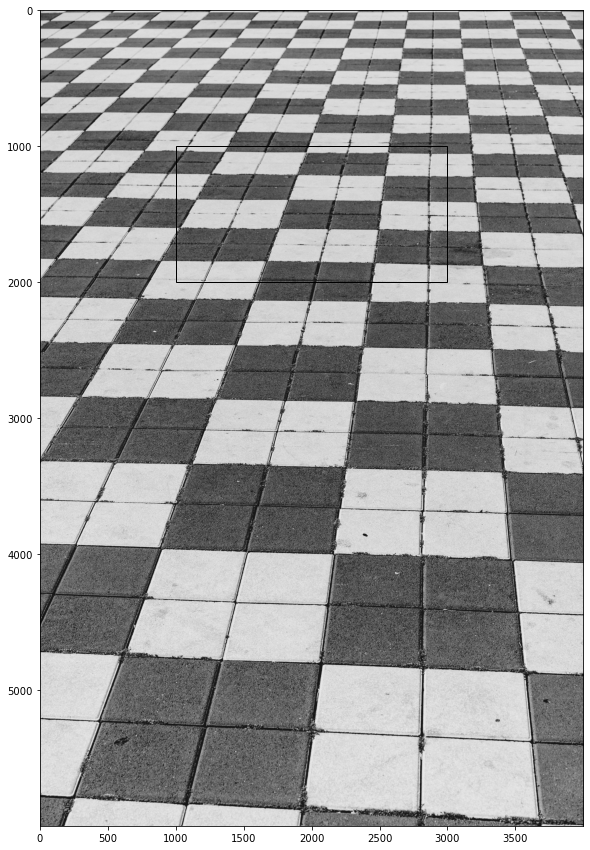

In [2]:
img = imageio.imread('floor_image.bmp')
f = plt.figure()
f.set_size_inches((15, 15))
plt.imshow(img, cmap='gray')
plt.gca().add_patch(
    patches.Rectangle(
        (1000, 1000),
        2000,
        1000,
        fill=False
     )
)
plt.show()

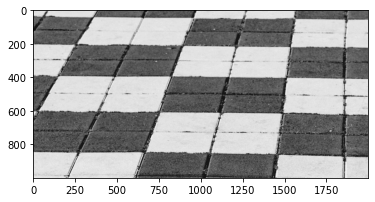

In [3]:
roi_img = img[1000:2000, 1000:3000]
plt.imshow(roi_img, cmap='gray')
plt.show()

In [36]:
num_measure_regions = 20
profiles = []
diffs = []
xs = []
prev = 0
img_regs = []
for reg in np.array_split(roi_img, num_measure_regions, axis=1):
    img_regs.append(reg)
    profile = np.sum(reg, axis=1) / reg.shape[1]    
    xs.append((prev + reg.shape[1])//2)
    prev = prev + reg.shape[1]
    diff = np.diff(profile)
    profiles.append(profile)
    diffs.append(diff)

diffs = np.stack(diffs, axis=0)
yvals = list(range(diffs.shape[1]))
ys = np.argmax(diffs, axis=1)

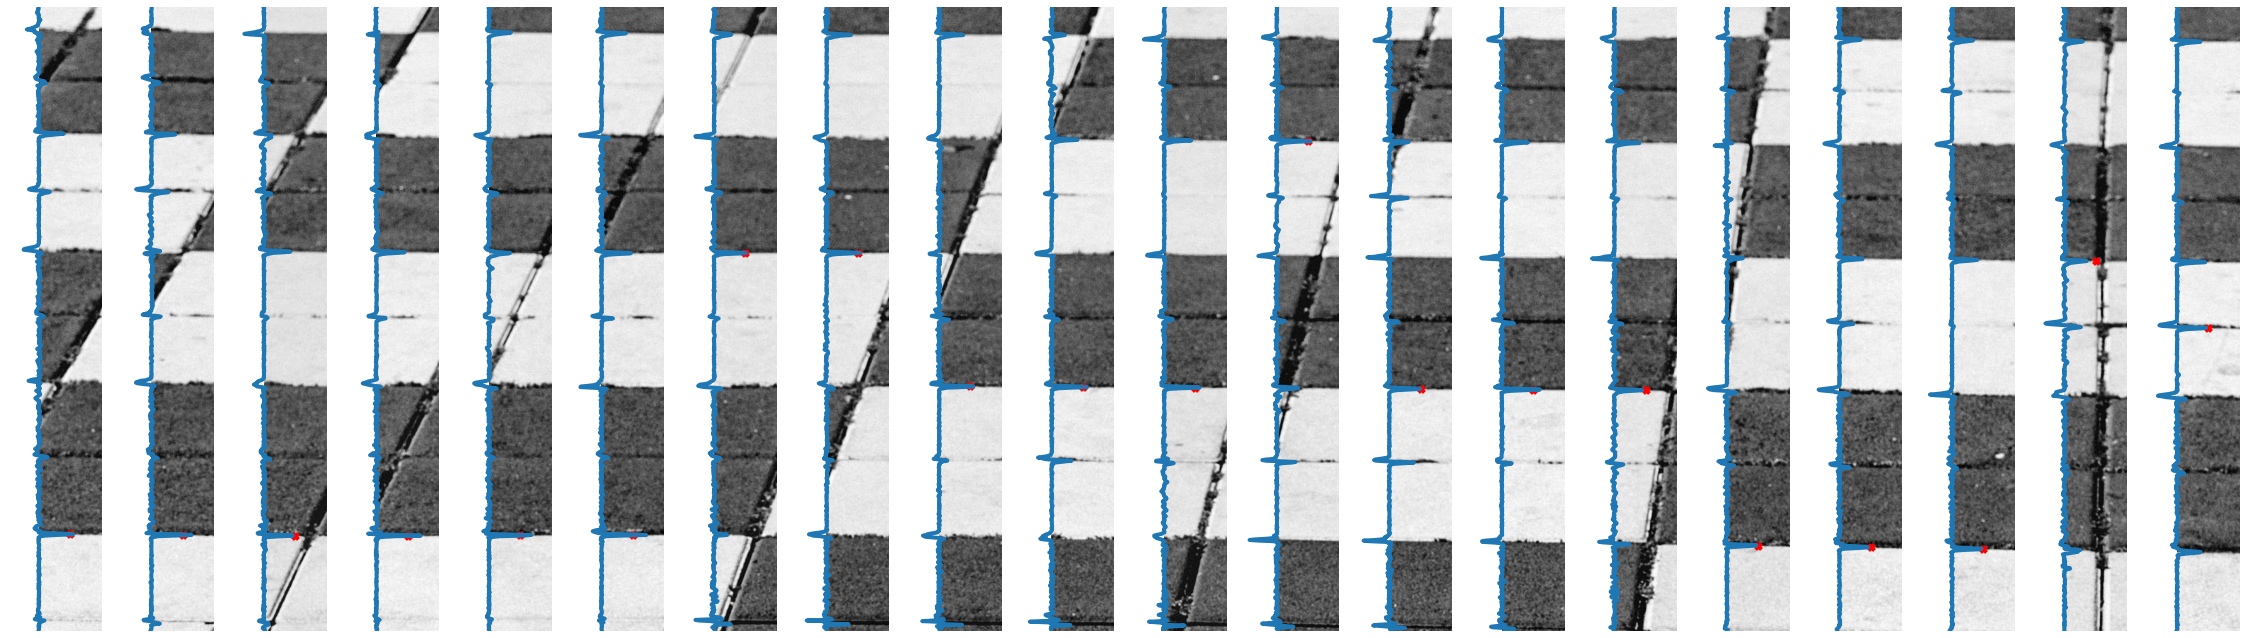

In [37]:
f, axes = plt.subplots(1,20,figsize=(40,40), sharex=True, sharey=True)
for rimg, ax, d, y in zip(img_regs, axes.flatten(), diffs, ys):
    ax.imshow(rimg, cmap='gray')
    ax.scatter(rimg.shape[1]//2,y,marker='x',c='r',linewidth=4.0)
    ax.plot(d, yvals, linewidth=4.0)
    ax.axis('off')
plt.show()